To begin with, I am going to open up the tsv files and use pandas to convert the dataset into tables so that we can look at the data information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv('train.tsv', delimiter='\t')
data_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [3]:
data_test=pd.read_csv('test.tsv', delimiter='\t')
data_test

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


As we can see, the train dataset has an extra column named "Sentiment" which is assigned to a phrase to denote the overall connation of the words used in the phrase. The test dataset does not have the "Sentiment" column, because we must assign a sentiment to the phrase ourselves using machine learning techniques. I will train using the train dataset and then implement my method on the test dataset. 

The sentiment evaluation labels are: 

0 = negative

1 = somewhat negative

2 = neutral 

3 = somewhat positive

4 = positive

To get a grasp on the information, I am going to create a pie chart displaying the percentages of each sentiment label from the train dataset in comparison to each other.

<Axes: >

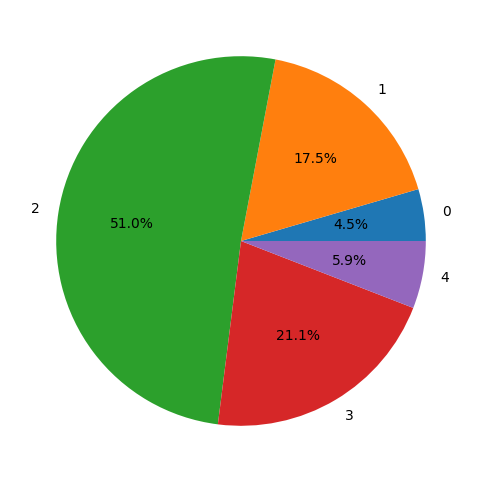

In [4]:
sentiment_groups = data_train.groupby(['Sentiment']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_groups.plot.pie(ax=ax, autopct='%1.1f%%')

In [8]:
print(sentiment_groups)

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
dtype: int64


It looks like overall, the sentiment seems to be neutral with 79582 instances of 2s. 

Text(0.5, 1.0, 'Training Data: Sentiment Instances')

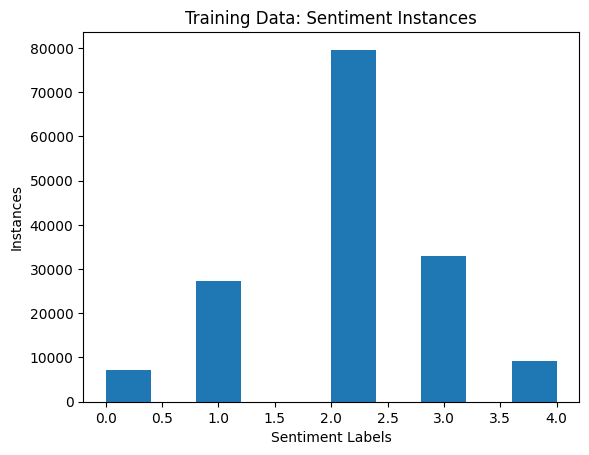

In [7]:
plt.hist(data_train['Sentiment'])
plt.xlabel("Sentiment Labels")
plt.ylabel("Instances")
plt.title("Training Data: Sentiment Instances")

The histogram shows that there is a normal distribution curve to the information as the reviews do not seem to have a lot of strong feelings of negativity nor postivity.

Text(0.5, 1.0, 'Training Data: Sentence Instances')

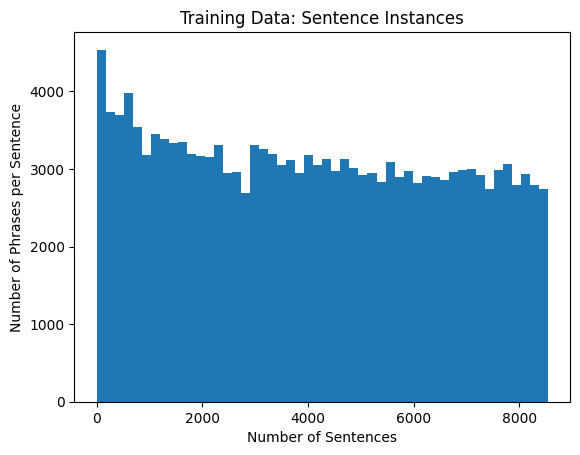

In [11]:
plt.hist(data_train['SentenceId'], bins=50)
plt.xlabel("Number of Sentences")
plt.ylabel("Number of Phrases per Sentence")
plt.title("Training Data: Sentence Instances")

This histogram shows that there are over 8000 sentences used in the train dataset and each sentence is chopped up into smaller phrases and maybe even just the word. This means that one sentence is used many times. The first few sentences are the most frequent as it seems they are chopped up and used many times, but as more sentences are used, the less frequent they are used. 

Text(0.5, 1.0, 'Testing Data: Sentence Instances')

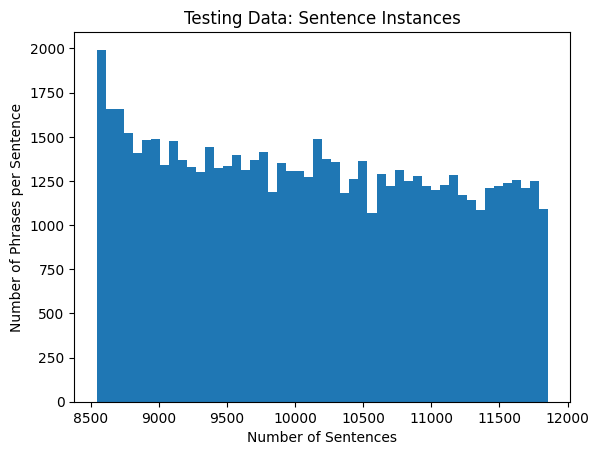

In [10]:
plt.hist(data_test['SentenceId'], bins=50)
plt.xlabel("Number of Sentences")
plt.ylabel("Number of Phrases per Sentence")
plt.title("Testing Data: Sentence Instances")

The same is true of the test dataset. Most of the sentence instances occur in the first several sentences before they become less chopped up and used less frequently.